In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.1.0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# train = pd.read_csv('train.csv',header=None,index_col=None)
# train.head()

,0,1,2,3,4,5,6,7,8,9,...,101506,101507,101508,101509,101510,101511,101512,101513,101514,101515
0,1.0,-97.965850,-108.864583,-135.088198,-90.735054,-104.371846,-101.609820,-101.101982,-117.574518,-93.177560,...,-81.177860,-75.125107,-87.810786,-83.691143,-73.280454,-77.571656,-81.848083,-46.919724,-30.780355,-28.470640
1,1.0,-99.600775,-108.036477,-100.214372,-88.474726,-111.721297,-93.101602,-93.495046,-94.518262,-94.833876,...,-77.200147,-78.177736,-72.907017,-79.540603,-78.619135,-85.789029,-81.353689,-105.236777,-79.894221,-109.972097
2,1.0,-96.495018,-96.562688,-116.417617,-95.419188,-112.215822,-89.438283,-97.414458,-98.058500,-88.688080,...,-82.624460,-82.358549,-78.091033,-93.480107,-77.426921,-113.507869,-97.245951,-74.550025,-76.434780,-79.464878
3,1.0,-98.606206,-112.833065,-86.226339,-90.900417,-97.853661,-91.110081,-98.220544,-97.734086,-107.444892,...,-85.907371,-75.909692,-87.104386,-87.210603,-76.453268,-76.379573,-87.735980,-93.861260,-74.671070,-120.194799
4,1.0,-99.106769,-122.428422,-95.130811,-93.196171,-112.508083,-102.458660,-93.133487,-106.476959,-88.825575,...,-78.619009,-72.002974,-101.188097,-79.267035,-81.332663,-80.713896,-86.603326,-72.778928,-83.377252,-83.006033


In [6]:
# np.save('train.npy', train)
train=np.load('train.npy')

In [7]:
train.shape

(462, 101516)

In [9]:
y_data=train[:,0]
y_data.shape

(462,)

In [10]:
x_data=train[:,1:]
x_data.shape


(462, 101515)

In [13]:
x2=x_data.reshape([462,257,395,1])

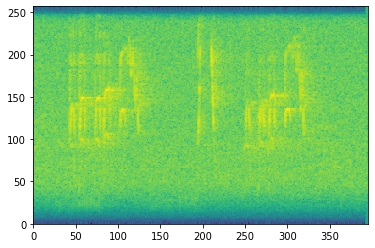

In [14]:
plt.pcolormesh(x2[160,:,:,0])

In [32]:
# do train test split 
x_train, x_test, y_train, y_test = train_test_split(x2, y_data, test_size=0.15, random_state=22)

In [33]:
x_train.shape

(392, 257, 395, 1)

In [34]:
y_train.shape

(392,)

In [35]:
inp_shape=(257,395,1)

In [19]:
yy=tf.keras.layers.Conv2D(32,(3,3),2,input_shape=inp_shape)(x_train)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [21]:
yy.shape

TensorShape([369, 128, 197, 32])

In [22]:
zz=tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='valid', data_format=None)(yy)
zz.shape

TensorShape([369, 63, 98, 32])

In [27]:
tt=tf.keras.layers.Conv2D(8, (3,3), 2)(zz)
tt.shape

TensorShape([369, 31, 48, 8])

In [28]:
kk=tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='valid', data_format=None)(tt)
kk.shape

TensorShape([369, 15, 23, 8])

In [29]:
tf.keras.layers.Flatten()(kk).shape

TensorShape([369, 2760])

In [37]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), 2,activation='relu',input_shape=inp_shape),
  tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='valid', data_format=None),
  tf.keras.layers.Conv2D(8, (3,3), 2,activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='valid', data_format=None),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1028, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [38]:
for ii in range(0,5):
    model.fit(x_train, y_train, epochs=1)
    model.evaluate(x_test,  y_test, verbose=2)


Train on 392 samples
392/392 [==============================] - 19s 48ms/sample - loss: 4.2501 - accuracy: 0.5051
70/70 - 2s - loss: 0.6094 - accuracy: 0.7000
Train on 392 samples
392/392 [==============================] - 18s 45ms/sample - loss: 0.6976 - accuracy: 0.6556
70/70 - 2s - loss: 0.6630 - accuracy: 0.7571
Train on 392 samples
392/392 [==============================] - 18s 46ms/sample - loss: 0.6107 - accuracy: 0.7551
70/70 - 2s - loss: 0.6072 - accuracy: 0.8000
Train on 392 samples
392/392 [==============================] - 18s 46ms/sample - loss: 0.5734 - accuracy: 0.7959
70/70 - 2s - loss: 0.5874 - accuracy: 0.8000
Train on 392 samples
392/392 [==============================] - 18s 45ms/sample - loss: 0.4676 - accuracy: 0.8189
70/70 - 2s - loss: 0.6013 - accuracy: 0.8286


In [44]:
model.save('C:/Users/dgnhk_000/Downloads/ARSU 2017/20170330_Uhu/Waldschnepfe_recog/my_model_epochs6_v2.h5')

In [45]:
for ii in range(0,1):
    model.fit(x_train, y_train, epochs=1)
    model.evaluate(x_test,  y_test, verbose=2)

Train on 392 samples
392/392 [==============================] - 18s 46ms/sample - loss: 0.2861 - accuracy: 0.8776
70/70 - 2s - loss: 0.6698 - accuracy: 0.7429


In [41]:
y_predict=model.predict(x_test)

In [42]:
y_pred = np.argmax(y_predict, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 
confusion_mtx

array([[46,  3],
       [12,  9]], dtype=int64)

In [41]:
from tensorflow.keras.models import load_model
import h5py

In [26]:
model.save('C:/Users/dgnhk_000/Downloads/ARSU 2017/20170330_Uhu/Waldschnepfe_recog/my_model_epochs20.h5')

In [36]:
del(model)